In [2]:
from utils import *
from tensorflow import keras

## Importing the Data

In [3]:
with open('_preproc_data/normalized_testing_training_data_red.pkl', 'rb') as f:
    normalized_testing_training_data_red = pickle.load(f)

In [4]:
normalized_testing_training_data_red.keys()

dict_keys(['X_train', 'Y_train', 'T_train', 'X_train_red', 'Y_train_red', 'T_train_red', 'X_test', 'Y_test', 'T_test'])

In [5]:
X_train = normalized_testing_training_data_red['X_train']
X_train_red = normalized_testing_training_data_red['X_train_red']
Y_train = normalized_testing_training_data_red['Y_train']
Y_train_red = normalized_testing_training_data_red['Y_train_red']
T_train = normalized_testing_training_data_red['T_train']
T_train_red = normalized_testing_training_data_red['T_train_red']

X_test = normalized_testing_training_data_red['X_test']
Y_test = normalized_testing_training_data_red['Y_test']
T_test = normalized_testing_training_data_red['T_test']

## Building the NN Model

In [6]:
model = keras.models.Sequential()

# First layer
model.add(keras.layers.Dense(100, 
                             activation = "relu", 
                             kernel_initializer = 'glorot_normal', 
                             bias_initializer = 'zeros'))
model.add(keras.layers.Dropout(rate = 0.25)) # Dropout layer (rate = 0.25)

# Second layer
model.add(keras.layers.Dense(100, 
                             activation = "relu", 
                             kernel_initializer = 'glorot_normal', 
                             bias_initializer = 'zeros'))
model.add(keras.layers.Dropout(rate = 0.25)) # Dropout layer (rate = 0.25)

# Third layer
model.add(keras.layers.Dense(100, 
                             activation = "relu", 
                             kernel_initializer = 'glorot_normal', 
                             bias_initializer = 'zeros'))

# Fourth layer (output layer)
model.add(keras.layers.Dense(6, activation = "softmax"))

model.build(input_shape = [None, 2])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  300       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  10100     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  10100     
_________________________________________________________________
dense_3 (Dense)              multiple                  606       
Total params: 21,106
Trainable params: 21,106
Non-trainable params: 0
____________________________________________________

In [9]:
filepath = os.path.abspath(os.path.join(os.getcwd(), '_nn_model', 'eigs_classification.hdf5'))

callbacks = [keras.callbacks.ModelCheckpoint(filepath = filepath, 
                                             monitor = 'loss', 
                                             mode = 'min', save_best_only = True, verbose = 1)]

model.compile(loss = "categorical_crossentropy", 
              optimizer = "Adam", 
              metrics = ["accuracy"])

history = model.fit(X_train_red, T_train_red, epochs = 200, callbacks = callbacks)

Train on 34116 samples
Epoch 1/200
33312/34116 [============================>.] - ETA: 0s - loss: 0.2172 - acc: 0.9277
Epoch 00001: loss improved from inf to 0.21689, saving model to /Users/sergio.dorado/Documents/GitHub_Repositories/01_Maintained/Papers/Tutorial_SGC_2020/_nn_model/eigs_classification.hdf5
34116/34116 [==============================] - 1s 41us/sample - loss: 0.2169 - acc: 0.9277
Epoch 2/200
33536/34116 [============================>.] - ETA: 0s - loss: 0.2047 - acc: 0.9309
Epoch 00002: loss improved from 0.21689 to 0.20422, saving model to /Users/sergio.dorado/Documents/GitHub_Repositories/01_Maintained/Papers/Tutorial_SGC_2020/_nn_model/eigs_classification.hdf5
34116/34116 [==============================] - 1s 37us/sample - loss: 0.2042 - acc: 0.9313
Epoch 3/200
33760/34116 [============================>.] - ETA: 0s - loss: 0.1994 - acc: 0.9324
Epoch 00003: loss improved from 0.20422 to 0.19919, saving model to /Users/sergio.dorado/Documents/GitHub_Repositories/01_Mai

Epoch 26/200
32800/34116 [===========================>..] - ETA: 0s - loss: 0.1689 - acc: 0.9418
Epoch 00026: loss did not improve from 0.16886
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1689 - acc: 0.9417
Epoch 27/200
32960/34116 [===========================>..] - ETA: 0s - loss: 0.1702 - acc: 0.9410
Epoch 00027: loss did not improve from 0.16886
34116/34116 [==============================] - 1s 34us/sample - loss: 0.1708 - acc: 0.9408
Epoch 28/200
33824/34116 [============================>.] - ETA: 0s - loss: 0.1706 - acc: 0.9405
Epoch 00028: loss did not improve from 0.16886
34116/34116 [==============================] - 1s 41us/sample - loss: 0.1704 - acc: 0.9406
Epoch 29/200
33152/34116 [============================>.] - ETA: 0s - loss: 0.1699 - acc: 0.9410
Epoch 00029: loss did not improve from 0.16886
34116/34116 [==============================] - 1s 38us/sample - loss: 0.1696 - acc: 0.9412
Epoch 30/200
34016/34116 [============================>.] - 

Epoch 56/200
33760/34116 [============================>.] - ETA: 0s - loss: 0.1662 - acc: 0.9420
Epoch 00056: loss did not improve from 0.16561
34116/34116 [==============================] - 1s 33us/sample - loss: 0.1664 - acc: 0.9420
Epoch 57/200
33152/34116 [============================>.] - ETA: 0s - loss: 0.1685 - acc: 0.9414
Epoch 00057: loss did not improve from 0.16561
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1684 - acc: 0.9413
Epoch 58/200
33376/34116 [============================>.] - ETA: 0s - loss: 0.1651 - acc: 0.9424
Epoch 00058: loss improved from 0.16561 to 0.16536, saving model to /Users/sergio.dorado/Documents/GitHub_Repositories/01_Maintained/Papers/Tutorial_SGC_2020/_nn_model/eigs_classification.hdf5
34116/34116 [==============================] - 1s 34us/sample - loss: 0.1654 - acc: 0.9423
Epoch 59/200
32800/34116 [===========================>..] - ETA: 0s - loss: 0.1666 - acc: 0.9413
Epoch 00059: loss did not improve from 0.16536
34116

Epoch 89/200
33216/34116 [============================>.] - ETA: 0s - loss: 0.1672 - acc: 0.9420- ETA: 0s - loss: 0.1675 - acc: 
Epoch 00089: loss did not improve from 0.16364
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1671 - acc: 0.9420
Epoch 90/200
33024/34116 [============================>.] - ETA: 0s - loss: 0.1652 - acc: 0.9423
Epoch 00090: loss did not improve from 0.16364
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1652 - acc: 0.9424
Epoch 91/200
33152/34116 [============================>.] - ETA: 0s - loss: 0.1664 - acc: 0.9422
Epoch 00091: loss did not improve from 0.16364
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1659 - acc: 0.9424
Epoch 92/200
32992/34116 [============================>.] - ETA: 0s - loss: 0.1643 - acc: 0.9427
Epoch 00092: loss did not improve from 0.16364
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1643 - acc: 0.9427
Epoch 93/200
33088/34116 [==

Epoch 122/200
33856/34116 [============================>.] - ETA: 0s - loss: 0.1670 - acc: 0.9417
Epoch 00122: loss did not improve from 0.16285
34116/34116 [==============================] - 1s 35us/sample - loss: 0.1670 - acc: 0.9417
Epoch 123/200
33056/34116 [============================>.] - ETA: 0s - loss: 0.1649 - acc: 0.9427
Epoch 00123: loss did not improve from 0.16285
34116/34116 [==============================] - 1s 37us/sample - loss: 0.1645 - acc: 0.9428
Epoch 124/200
33664/34116 [============================>.] - ETA: 0s - loss: 0.1641 - acc: 0.9425
Epoch 00124: loss did not improve from 0.16285
34116/34116 [==============================] - 1s 35us/sample - loss: 0.1638 - acc: 0.9427
Epoch 125/200
33984/34116 [============================>.] - ETA: 0s - loss: 0.1628 - acc: 0.9432
Epoch 00125: loss did not improve from 0.16285
34116/34116 [==============================] - 1s 34us/sample - loss: 0.1630 - acc: 0.9432
Epoch 126/200
32864/34116 [===========================>.

Epoch 154/200
32992/34116 [============================>.] - ETA: 0s - loss: 0.1634 - acc: 0.9432
Epoch 00154: loss did not improve from 0.16131
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1631 - acc: 0.9433
Epoch 155/200
33792/34116 [============================>.] - ETA: 0s - loss: 0.1627 - acc: 0.9433
Epoch 00155: loss did not improve from 0.16131
34116/34116 [==============================] - 1s 31us/sample - loss: 0.1630 - acc: 0.9431
Epoch 156/200
33568/34116 [============================>.] - ETA: 0s - loss: 0.1625 - acc: 0.9429
Epoch 00156: loss did not improve from 0.16131
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1621 - acc: 0.9431
Epoch 157/200
33248/34116 [============================>.] - ETA: 0s - loss: 0.1617 - acc: 0.9436
Epoch 00157: loss did not improve from 0.16131
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1623 - acc: 0.9433
Epoch 158/200
34080/34116 [============================>

Epoch 187/200
33184/34116 [============================>.] - ETA: 0s - loss: 0.1625 - acc: 0.9431
Epoch 00187: loss did not improve from 0.16008
34116/34116 [==============================] - 1s 34us/sample - loss: 0.1622 - acc: 0.9432
Epoch 188/200
33536/34116 [============================>.] - ETA: 0s - loss: 0.1634 - acc: 0.9428
Epoch 00188: loss did not improve from 0.16008
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1632 - acc: 0.9429
Epoch 189/200
33344/34116 [============================>.] - ETA: 0s - loss: 0.1638 - acc: 0.9428
Epoch 00189: loss did not improve from 0.16008
34116/34116 [==============================] - 1s 32us/sample - loss: 0.1633 - acc: 0.9430
Epoch 190/200
32608/34116 [===========================>..] - ETA: 0s - loss: 0.1629 - acc: 0.9429
Epoch 00190: loss did not improve from 0.16008
34116/34116 [==============================] - 1s 31us/sample - loss: 0.1624 - acc: 0.9430
Epoch 191/200
33952/34116 [============================>

## Prediction with the NN Classifier

In [11]:
model.load_weights(filepath)

scores = model.evaluate(X_test, keras.utils.to_categorical(Y_test - 1))

242734/242734 [==============================] - 3s 14us/sample - loss: 0.1486 - acc: 0.9583


In [16]:
Y_logits = model.predict(X_test) # Probability of the input to belong to each of the classes
Y_pred = np.argmax(Y_logits, axis = 1) + 1

In [17]:
Y_pred

array([5, 5, 5, ..., 5, 5, 1])

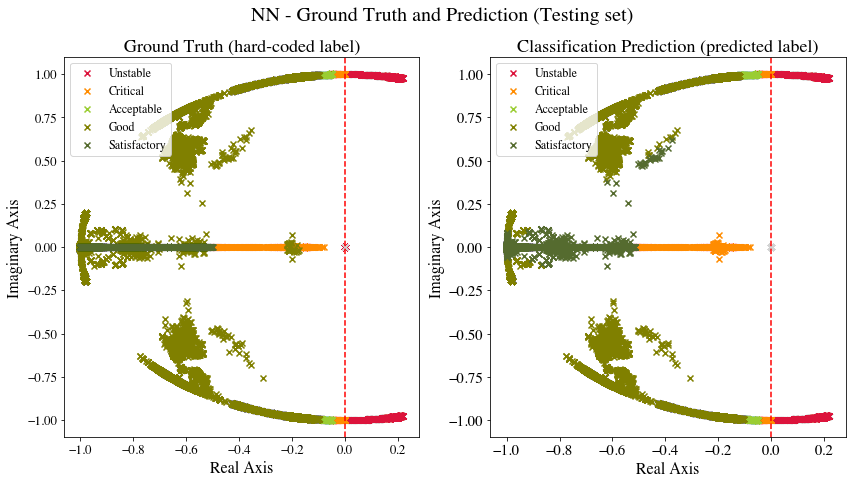

In [18]:
prediction_plotting(X_test, Y_test, Y_pred, model_name = "NN", fontname = "Times")